In [1]:
import pandas as pd
import numpy as np 

In [7]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Mall_Customers (1).csv")

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Sample data (replace this with your actual data loading code)

In [ ]:
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 120, 120, 15, 16, 17],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 79, 77, 40, 3, 72]
})

In [ ]:
# Select relevant features for clustering

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine optimal number of clusters using Elbow Method

In [ ]:
wcss = []
silhouette_scores = []
max_clusters = 10
plt.figure(figsize=(15, 5))

In [ ]:
# Elbow Method plot

In [ ]:
plt.subplot(1, 2, 1)
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Only calculate silhouette score for valid cluster counts (2 to n_samples-1)
    if 1 < i < len(X):
        try:
            score = silhouette_score(X_scaled, kmeans.labels_)
            silhouette_scores.append(score)
        except ValueError:
            silhouette_scores.append(np.nan)

plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Silhouette Score plot

In [ ]:
plt.subplot(1, 2, 2)
valid_clusters = range(2, 2+len(silhouette_scores))
plt.plot(valid_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# Based on the plots, select optimal number of clusters (let's assume 5)

In [ ]:
optimal_clusters = 5

In [72]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# Visualize the clusters

In [ ]:
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(data[data['Cluster'] == i]['Annual Income (k$)'],
                data[data['Cluster'] == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

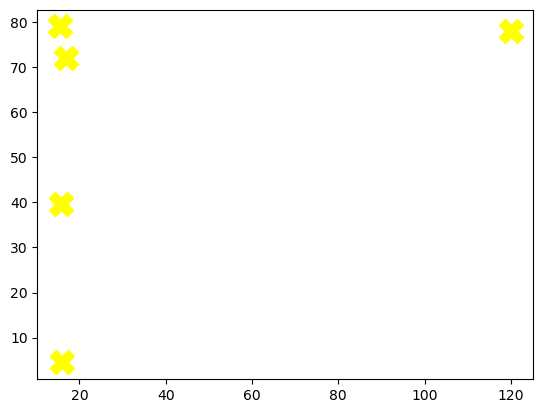

In [50]:
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


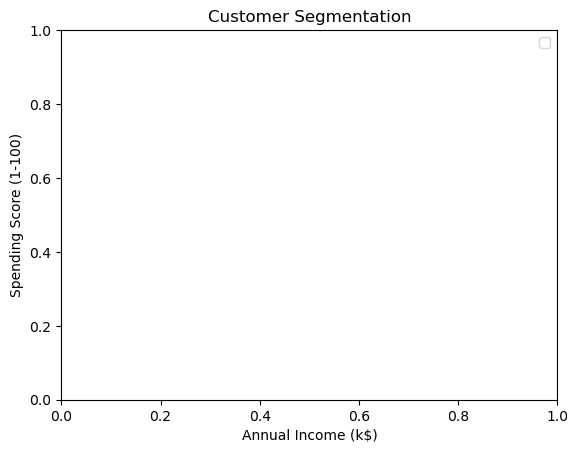

In [52]:
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Analyze cluster characteristics

In [ ]:
cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count',
    'Gender': lambda x: x.mode()[0]
}).rename(columns={'CustomerID': 'Count', 'Gender': 'Dominant Gender'})

In [80]:
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)  Count  \
Cluster                                                                 
0        42.716049           55.296296               49.518519     81   
1        32.692308           86.538462               82.128205     39   
2        25.272727           25.727273               79.363636     22   
3        41.114286           88.200000               17.114286     35   
4        45.217391           26.304348               20.913043     23   

        Dominant Gender  
Cluster                  
0                Female  
1                Female  
2                Female  
3                  Male  
4                Female  


In [ ]:
# Interpretation of clusters

In [ ]:
print("\nCluster Interpretation:")
interpretation = {
    0: "Low Income, Medium Spending - Budget conscious",
    1: "Low Income, High Spending - Carefree spenders",
    2: "High Income, High Spending - Premium customers",
    3: "High Income, Low Spending - Conservative spenders",
    4: "Medium Income, Low Spending - Cautious customers"
}

In [84]:
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num}: {interpretation.get(cluster_num, 'Unknown segment')}")

Cluster 0: Low Income, Medium Spending - Budget conscious
Cluster 1: Low Income, High Spending - Carefree spenders
Cluster 2: High Income, High Spending - Premium customers
Cluster 3: High Income, Low Spending - Conservative spenders
Cluster 4: Medium Income, Low Spending - Cautious customers


In [ ]:
# Elbow Method plot

In [ ]:
plt.subplot(1, 2, 1)
wcss = []  # Make sure to reset/initialize wcss as empty list
max_clusters = 10  # Or whatever your desired max is

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot with matching dimensions
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

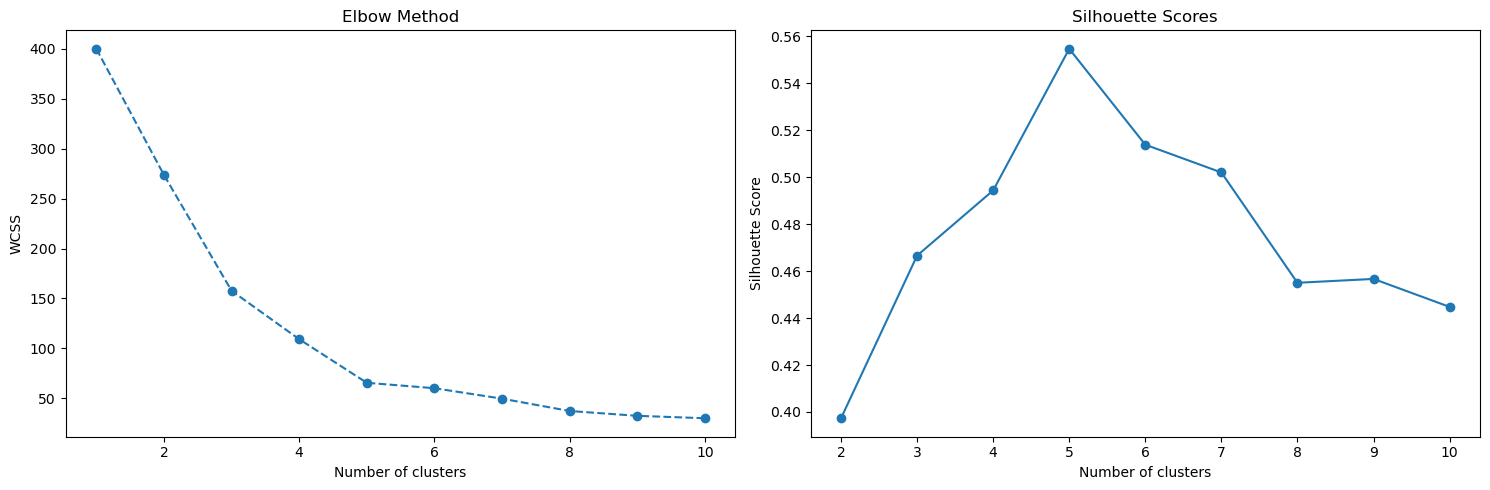


Optimal number of clusters: 5


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


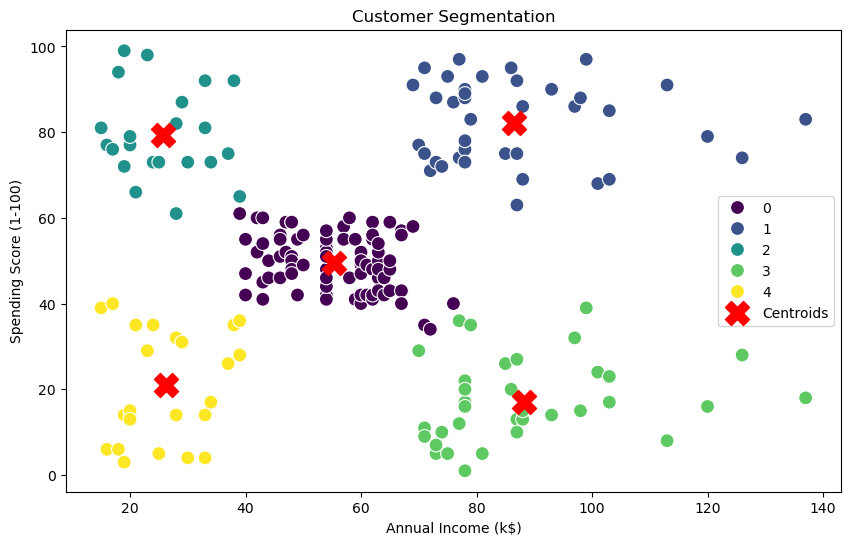


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)  Count  \
Cluster                                                                 
0        42.716049           55.296296               49.518519     81   
1        32.692308           86.538462               82.128205     39   
2        25.272727           25.727273               79.363636     22   
3        41.114286           88.200000               17.114286     35   
4        45.217391           26.304348               20.913043     23   

        Dominant Gender  
Cluster                  
0                Female  
1                Female  
2                Female  
3                  Male  
4                Female  
